In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def CCD_position(pos):
    
    new_pos1 = 10**7/(10**7/633 - pos)
    new_pos2 = 10**7/(10**7/634 - pos)
    
    return new_pos1, new_pos2
    

In [4]:
def generate_data(data):
    y = np.exp(-1*(data - pick_1)**2/variance) + np.exp(-1*(data - pick_2)**2/variance) \
+ np.exp(-1*(data - pick_3)**2/variance) + np.exp(-1*(data - pick_4)**2/variance)\
+ np.exp(-1*(data - pick_5)**2/variance)
    return y

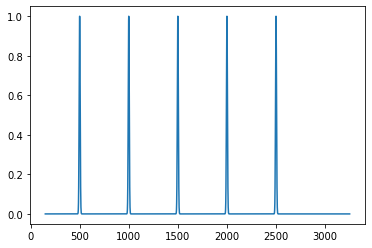

In [5]:
x = np.linspace(150, 3250 , 3101)

variance = 50
pick_1 = 500
pick_2 = 1000
pick_3 = 1500
pick_4 = 2000
pick_5 = 2500
data1 = generate_data(x)
plt.plot(x,data1)

In [6]:
x2, x3 = CCD_position(x)

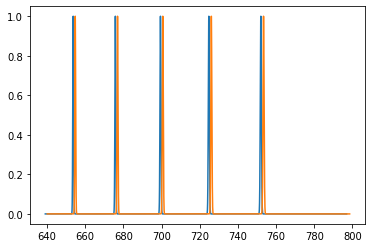

In [7]:
plt.plot(x2,data1)
plt.plot(x3,data1)

## Lock in Amp

In [9]:
def wave(t, phi,T):    ### generating the wave
    return np.sin(2*np.pi*np.array(list(range(t)))/T + phi)



In [10]:
def discretize(x, n):    ### Discretize the wave for showing on 2m pixel of 512 pixels
    m = np.round(x*n)    
    return m

In [11]:
def normal(x, sigma, mean):
    y = (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-(x - mean)**2/(2*sigma**2))
    return y

In [12]:
def lowpass(x, alpha=0.01):
    data = [x[0]]
    for a in x[1:]:
        data.append(data[-1] + (alpha*(a-data[-1])))
    return np.array(data)

In [13]:
def pixel_to_wavelength(pixel):
    
    wave_length = 640 + 160/1023 * pixel
    
    return wave_length
    
    

In [14]:
def calc_position(pos1 , pos2):
    
    
    # we assume that pos1 < pos2
    
#     new_pos1 = 10**7*(1/633 - 1/pos1)
#     new_pos2 = 10**7*(1/634 - 1/pos2)
    
    new_pos1 = 10**7/(10**7/633 - pos1)
    
    # if we have coorect pos1 and pos2, we should have new_pos1 = new_pos2
    
    return new_pos1
    
    
    

In [15]:

t = 4000
dataframe = np.zeros([512, 1024, t])


dataframe[256:,:,:] = 1

phi1 = 0
phi2 = np.pi/2


pivot = 256

amp = 100


ref1 = wave(t, phi1, 100)
ref2 = wave(t, phi2, 100)



data = {'X' : [], 'Y' : [], 'position' : [], 'intensity' : []}


frq = 100

for j in range(150, 3250):
    
    freq = 100
    
#     if j == 256:
#         freq = 100
        
#     else: 
#         freq = 1000 + np.random.randn(1)[0]*50    

    
#     ref1 = wave(t, phi1, freq)
#     ref2 = wave(t, phi2, freq)
    
#     wave1 = amplitudes[j]*wave(t, phi1 , freq) + np.random.rand(1000) * 0.001
#     loc_wave1 = discretize(wave1, 100) + 256
#     loc_wave1 = loc_wave1.astype(int)

    DC = 0

    wave1 = data1[j - 150]*wave(t, phi1 , freq) 

    wave2 = data1[j - 150]*wave(t, phi2, freq) 
    
#     wave_length = pixel_to_wavelength(j)
    
#     wave_length_next_channel = pixel_to_wavelength(j+10)
    
#     final_position = calc_position(j, wave_length_next_channel)

    final_position = j
    
    
#     wave2 = amplitudes[j+10]*wave(t, phi2, freq) + np.random.rand(1000) * 0.001
#     loc_wave2 = discretize(wave2, 100) + 256
#     loc_wave2 = loc_wave2.astype(int)

    # We assume that DC value is equal to 0 

    wave1 = wave1 * (wave1 >= DC).astype(int)
    wave2 = wave2 * (wave2 >= DC).astype(int)
    
    In_phase = ref1 * wave1
    In_phase_after_filter = lowpass(In_phase)
    quad = wave2 * ref2
    quad_after_filter = lowpass(quad)

    #magnitude = np.sqrt(In_phase_after_filter + quad_after_filter)**2
    #phase = np.arctan2(np.sqrt(quad_after_filter), np.sqrt(In_phase_after_filter))
    
    decoder = wave(t, phi1, 2*100)
    x = In_phase_after_filter*decoder
    y = quad_after_filter*decoder

    data['X'].append(x)
    data['Y'].append(y)
    data['position'].append(final_position)
    data['intensity'].append(np.mean((np.array(data['X'][j - 150]) + np.array(data['Y'][j - 150]))*decoder))

# fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(12,4)
# axes[0].plot(x)
# axes[1].plot(y)

# axes[0].set_title('Magnitude')
# axes[1].set_title('Phase (Radian)')


In [23]:
data1[499]

1.4607104805253447e-193

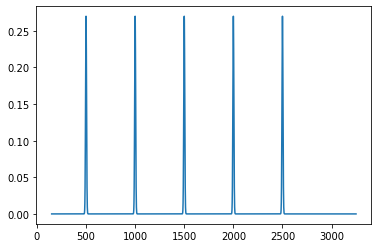

In [16]:
plt.plot(data['position'], data['intensity'])


In [21]:

t = 4000
dataframe = np.zeros([512, 1024, t])



first_channel = 256
second_channel = 263


dataframe[256:,:,:] = 1

phi1 = 0
phi2 = np.pi/2


pivot = 256

amp = 100


ref1 = wave(t, phi1, 100)
ref2 = wave(t, phi2, 100)



data = {'X' : [], 'Y' : [], 'position' : [], 'intensity' : []}


frq = 100

for j in range(150, 3250):
    
    freq = 100
    
#     if j == 256:
#         freq = 100
        
#     else: 
#         freq = 1000 + np.random.randn(1)[0]*50    

    
#     ref1 = wave(t, phi1, freq)
#     ref2 = wave(t, phi2, freq)
    
#     wave1 = amplitudes[j]*wave(t, phi1 , freq) + np.random.rand(1000) * 0.001
#     loc_wave1 = discretize(wave1, 100) + 256
#     loc_wave1 = loc_wave1.astype(int)

    DC = 0.8

    wave1 = data1[j - 150]*wave(t, phi1 , freq) 

    wave2 = data1[j - 150]*wave(t, phi2, freq) 
    
#     wave_length = pixel_to_wavelength(j)
    
#     wave_length_next_channel = pixel_to_wavelength(j+10)
    
#     final_position = calc_position(j, wave_length_next_channel)

    final_position = j
    
    
    
    
#     wave2 = amplitudes[j+10]*wave(t, phi2, freq) + np.random.rand(1000) * 0.001
#     loc_wave2 = discretize(wave2, 100) + 256
#     loc_wave2 = loc_wave2.astype(int)

    # We assume that DC value is equal to 0 

    wave1 = wave1 * (wave1 >= DC).astype(int)
    wave2 = wave2 * (wave2 >= DC).astype(int)
    
    In_phase = ref1 * wave1
    In_phase_after_filter = lowpass(In_phase)
    quad = wave2 * ref2
    quad_after_filter = lowpass(quad)

    #magnitude = np.sqrt(In_phase_after_filter + quad_after_filter)**2
    #phase = np.arctan2(np.sqrt(quad_after_filter), np.sqrt(In_phase_after_filter))
    
    decoder = wave(t, phi1, 2*100)
    x = In_phase_after_filter*decoder
    y = quad_after_filter*decoder

    data['X'].append(x)
    data['Y'].append(y)
    data['position'].append(final_position)
    data['intensity'].append(np.mean((np.array(data['X'][j - 150]) + np.array(data['Y'][j - 150]))*decoder))

# fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(12,4)
# axes[0].plot(x)
# axes[1].plot(y)

# axes[0].set_title('Magnitude')
# axes[1].set_title('Phase (Radian)')


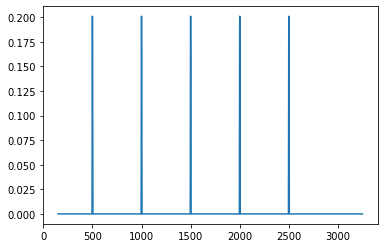

In [22]:
plt.plot(data['position'], data['intensity'])

# Overlapping

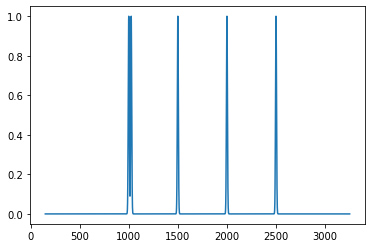

In [19]:
x = np.linspace(150, 3250 , 3101)

variance = 50
pick_1 = 1000
pick_2 = 1025
pick_3 = 1500
pick_4 = 2000
pick_5 = 2500
data1 = generate_data(x)
plt.plot(x,data1)

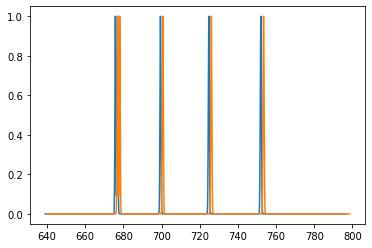

In [20]:
plt.plot(x2,data1)
plt.plot(x3,data1)

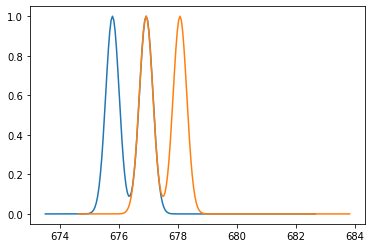

In [21]:
plt.plot(x2[800:1000],data1[800:1000])
plt.plot(x3[800:1000],data1[800:1000])

In [22]:

t = 4000
dataframe = np.zeros([512, 1024, t])



first_channel = 256
second_channel = 263


dataframe[256:,:,:] = 1

phi1 = 0
phi2 = np.pi/2


pivot = 256

amp = 100


ref1 = wave(t, phi1, 100)
ref2 = wave(t, phi2, 100)



data = {'X' : [], 'Y' : [], 'position' : [], 'intensity' : []}


frq = 100

for j in range(150, 3250):
    
    freq = 100
    
#     if j == 256:
#         freq = 100
        
#     else: 
#         freq = 1000 + np.random.randn(1)[0]*50    

    
#     ref1 = wave(t, phi1, freq)
#     ref2 = wave(t, phi2, freq)
    
#     wave1 = amplitudes[j]*wave(t, phi1 , freq) + np.random.rand(1000) * 0.001
#     loc_wave1 = discretize(wave1, 100) + 256
#     loc_wave1 = loc_wave1.astype(int)

    DC = 0

    wave1 = data1[j - 150]*wave(t, phi1 , freq) 

    wave2 = data1[j - 150]*wave(t, phi2, freq) 
    
    wave_length = pixel_to_wavelength(j)
    
    wave_length_next_channel = pixel_to_wavelength(j+10)
    
    final_position = calc_position(j, wave_length_next_channel)
    
    
    
    
#     wave2 = amplitudes[j+10]*wave(t, phi2, freq) + np.random.rand(1000) * 0.001
#     loc_wave2 = discretize(wave2, 100) + 256
#     loc_wave2 = loc_wave2.astype(int)

    # We assume that DC value is equal to 0 

    wave1 = wave1 * (wave1 >= DC).astype(int)
    wave2 = wave2 * (wave2 >= DC).astype(int)
    
    In_phase = ref1 * wave1
    In_phase_after_filter = lowpass(In_phase)
    quad = wave2 * ref2
    quad_after_filter = lowpass(quad)

    #magnitude = np.sqrt(In_phase_after_filter + quad_after_filter)**2
    #phase = np.arctan2(np.sqrt(quad_after_filter), np.sqrt(In_phase_after_filter))
    
    decoder = wave(t, phi1, 2*100)
    x = In_phase_after_filter*decoder
    y = quad_after_filter*decoder

    data['X'].append(x)
    data['Y'].append(y)
    data['position'].append(final_position)
    data['intensity'].append(np.mean((np.array(data['X'][j - 150]) + np.array(data['Y'][j - 150]))*decoder))

# fig, axes = plt.subplots(nrows=1, ncols=2)
# fig.set_size_inches(12,4)
# axes[0].plot(x)
# axes[1].plot(y)

# axes[0].set_title('Magnitude')
# axes[1].set_title('Phase (Radian)')


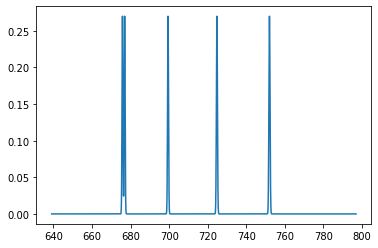

In [23]:
plt.plot(data['position'], data['intensity'])